In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import scipy

# Q2 Linear Prediction Analysis

In [2]:
y, sr = librosa.load("../wavs/q2_audio.wav")

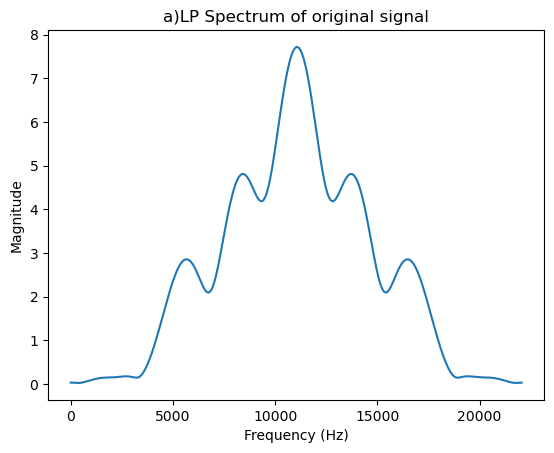

In [3]:
lp_coefficients= librosa.lpc(y, order=10)
lp_fft = np.fft.fft(lp_coefficients,n=256)
freq = np.linspace(0, sr, 256)
plt.plot(freq, np.abs(lp_fft))
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("a)LP Spectrum of original signal")
plt.show()

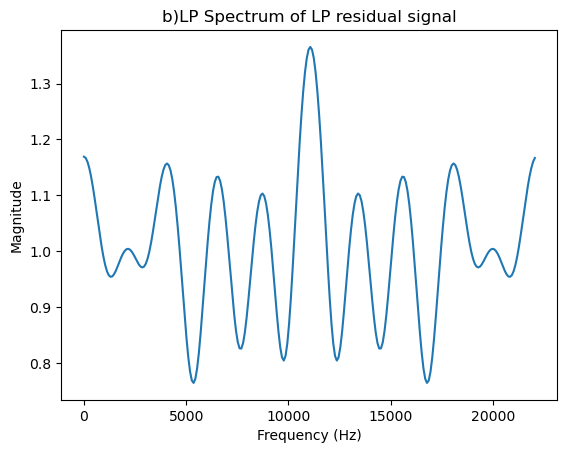

In [4]:
b = np.hstack([[0], -1 * lp_coefficients[1:]])
y_hat = scipy.signal.lfilter(b, [1], y)
lp_residual = y - y_hat

lp_coefficients= librosa.lpc(lp_residual, order=10)

lp_fft = np.fft.fft(lp_coefficients,n=256)
freq = np.linspace(0, sr, 256)
plt.plot(freq, np.abs(lp_fft))
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("b)LP Spectrum of LP residual signal")
plt.show()

### c)Comparison for Estimating Pitch:

- To estimate pitch, the LP spectrum of the signal is better as it contains information about both harmonic and non-harmonic components.
- The LP spectrum of the LP residual has information only about non-harmonic part of signal or noise.
- Therefore, it's better to use the LP spectrum of the original signal

# Q3 Zero Frequency Filtering

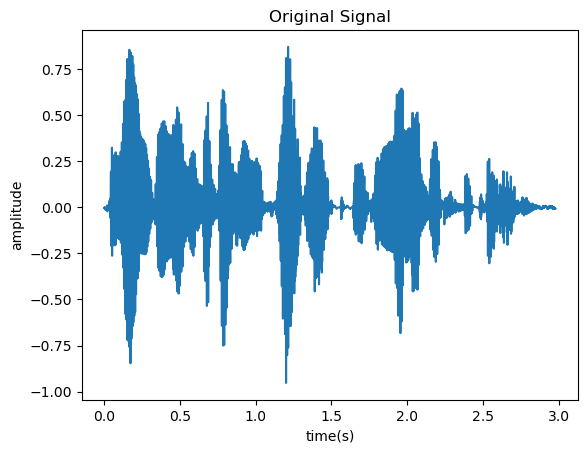

In [5]:
y, sr = librosa.load("../wavs/q2_audio.wav")
t = np.arange(0,(len(y))/sr, 1/sr)
plt.plot(t,y);
plt.title("Original Signal")
plt.xlabel("time(s)")
plt.ylabel("amplitude");

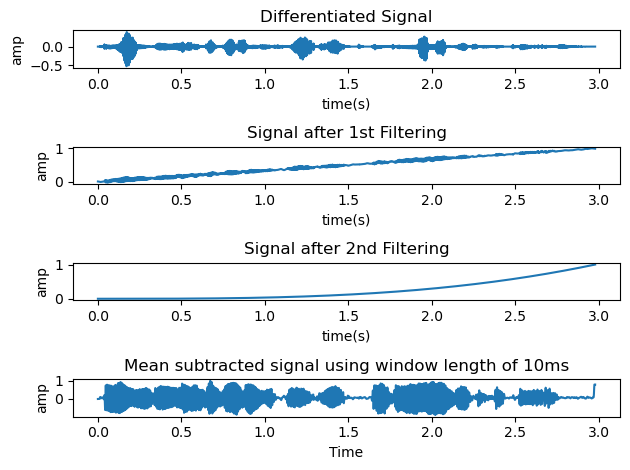

In [6]:
x = np.zeros(len(y))
for k in range(2,len(x)):
    x[k] = y[k]-y[k-1]

plt.subplot(4,1,1)
plt.plot(t,x);
plt.title("Differentiated Signal")
plt.xlabel("time(s)")
plt.ylabel("amp");

b = np.array([1.0])
a = np.array([1.0, -2.0, 1.0])
x = scipy.signal.lfilter(b, a, x)

plt.subplot(4,1,2)
plt.plot(t,x/np.max(np.abs(x)));
plt.title("Signal after 1st Filtering")
plt.xlabel("time(s)")
plt.ylabel("amp");

x = scipy.signal.lfilter(b,a,x)
x=x/np.max(np.abs(x))
plt.subplot(4,1,3)
plt.plot(t,x);
plt.title("Signal after 2nd Filtering")
plt.xlabel("time(s)")
plt.ylabel("amp");

yf = np.copy(x)

# 10ms => sr*10/1000 samples => 2N + 1 samples
N = (sr*10//1000)//2
N

x = np.copy(yf)
temp_sum = np.sum(x[:2*N+1])

filt_x = np.copy(x)
for k in range(N,len(x)):
    if k<len(x)-N:
        filt_x[k] = x[k] - temp_sum/(2*N + 1)
        temp_sum = temp_sum - x[k-N-1] + x[k+N]
    else:
        filt_x[k] = filt_x[k-1]
filt_x[0:2*N+2] = filt_x[2*N+2] 
        
x = np.copy(filt_x)
temp_sum = np.sum(x[:2*N+1])
filt_x = np.zeros(len(x))

for k in range(2*N+1,len(x)):
    if k<len(x)-N:
        filt_x[k] = x[k] - temp_sum/(2*N + 1)
        temp_sum = temp_sum - x[k-N-1] + x[k+N]
    else:
        filt_x[k] = filt_x[k-1]
filt_x[0:2*N+2] = filt_x[2*N+2] 
filt_x = filt_x / np.max(np.abs(filt_x))

plt.subplot(4,1,4)
plt.plot(t,filt_x);
plt.xlabel("Time")
plt.ylabel("amp")
plt.title("Mean subtracted signal using window length of 10ms")
plt.tight_layout()
plt.show()

In [7]:
positive_zero_crossings = np.where((filt_x[:-1] <= 0) & (filt_x[1:] > 0))[0]
print("the time instances of epochs are:-")
print(t[positive_zero_crossings])

the time instances of epochs are:-
[0.01006803 0.03582766 0.04512472 0.05283447 0.06099773 0.06911565
 0.07750567 0.08585034 0.09414966 0.10226757 0.11047619 0.11814059
 0.12585034 0.13319728 0.14040816 0.14739229 0.15428571 0.16104308
 0.1676644  0.17414966 0.18054422 0.18671202 0.19265306 0.19877551
 0.2045805  0.21015873 0.21600907 0.221678   0.22712018 0.23278912
 0.23836735 0.24380952 0.24920635 0.25482993 0.26045351 0.2660771
 0.27188209 0.27782313 0.28385488 0.29006803 0.2968254  0.30371882
 0.31079365 0.3184127  0.32598639 0.33405896 0.3415873  0.35002268
 0.35782313 0.36580499 0.3739229  0.38208617 0.39056689 0.39895692
 0.40743764 0.41587302 0.42444444 0.43306122 0.4415873  0.45015873
 0.45863946 0.46721088 0.47619048 0.4845805  0.49328798 0.5015873
 0.51024943 0.51891156 0.52761905 0.53646259 0.54566893 0.55482993
 0.56367347 0.5721542  0.58063492 0.58938776 0.59823129 0.60730159
 0.61632653 0.62535147 0.63473923 0.6446712  0.6537415  0.66244898
 0.670839   0.67931973 0.6881

# Q4 Prosody Features

### ==> in Code_4.m